Name:- Mahesh Marathe

Roll No.:-391035

PRN:-22211533

Batch:- A2

Title:-Perform bag-of-words approach (count occurrence, normalized count occurrence), TF-IDF on data. Create embeddings using Word2Vec

Objectives:

To understand and implement the Bag-of-Words (BoW) model for text representation.

To compute and analyze word frequencies using:

Raw count

Normalized count

To perform Term Frequency–Inverse Document Frequency (TF-IDF) vectorization.

To create and visualize word embeddings using Word2Vec.

To compare traditional vectorization techniques (BoW/TF-IDF) with semantic word embeddings (Word2Vec).


Theory:
1. Bag-of-Words (BoW):
BoW is a basic technique for text representation.

It involves counting the number of times each word appears in a document.

Raw Count: Counts the number of times a word occurs.

Normalized Count: Raw count divided by the total number of words in the document (frequency).

2. TF-IDF (Term Frequency – Inverse Document Frequency):
TF-IDF enhances BoW by reducing the weight of common words and increasing the weight of rare, informative words.

Term Frequency (TF): Measures how frequently a word occurs in a document.

Inverse Document Frequency (IDF): Penalizes words that appear in many documents.

TF-IDF = TF × IDF

3. Word2Vec:
Word2Vec is a neural network-based technique that learns vector representations of words based on their context.

Two main architectures:

CBOW (Continuous Bag of Words): Predicts a word based on surrounding context.

Skip-Gram: Predicts surrounding words based on the current word.

Produces dense, low-dimensional embeddings that capture semantic relationships.



In [1]:


string1 = "Data science is fun and interesting"
string2 = "Data science is fun"
string3 = "science is interesting"

string1=string1.lower()
string2=string2.lower()
string3=string3.lower()

tokens1=string1.split()
tokens2=string2.split()
tokens3=string3.split()

print(tokens1)
print(tokens2)
print(tokens3)


['data', 'science', 'is', 'fun', 'and', 'interesting']
['data', 'science', 'is', 'fun']
['science', 'is', 'interesting']


In [3]:
def vectorize(tokens):
    vector=[]
    for w in filtered_vocab:
        vector.append(tokens.count(w))
    return vector

def unique(sequence):
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]
stopwords=["to","was","a"]
special_char=[",",":"," ",";",".","?"]

In [4]:
vocab=unique(tokens1+tokens2+tokens3)
print(vocab)


filtered_vocab=[]

for w in vocab:
    if w not in stopwords and w not in special_char:
        filtered_vocab.append(w)
print("Final filtered vocabulary: ", filtered_vocab)



vector1=vectorize(tokens1)
print("Sentence 1 vector :",vector1)

vector2=vectorize(tokens2)
print("Sentence 2 vector :",vector2)

vector3=vectorize(tokens3)
print("Sentence 3 vector :",vector3)

['data', 'science', 'is', 'fun', 'and', 'interesting']
Final filtered vocabulary:  ['data', 'science', 'is', 'fun', 'and', 'interesting']
Sentence 1 vector : [1, 1, 1, 1, 1, 1]
Sentence 2 vector : [1, 1, 1, 1, 0, 0]
Sentence 3 vector : [0, 1, 1, 0, 0, 1]


In [5]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

string1 = "Data science is fun and interesting"
string2 = "Data science is fun"
string3 = "science is interesting"
string4 = "data is interesting"

doc = string1+string2+string3+string4

CountVec = CountVectorizer(ngram_range=(1,1))
Count_data = CountVec.fit_transform([string1,string2,string3,string4])


cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())
print(cv_dataframe)

   and  data  fun  interesting  is  science
0    1     1    1            1   1        1
1    0     1    1            0   1        1
2    0     0    0            1   1        1
3    0     1    0            1   1        0


In [6]:

count_vec = CountVectorizer()
count_occurs = count_vec.fit_transform([doc])
count_occur_df = pd.DataFrame((count, word) for word, count in zip(count_occurs.toarray().tolist()[0], count_vec.get_feature_names_out()))
count_occur_df.columns = ['Word', 'Count']
count_occur_df.sort_values('Count', ascending=False, inplace=True)
count_occur_df.head()


,Word,Count
6,is,4
5,interestingdata,2
7,science,2
0,and,1
3,funscience,1


In [7]:

from sklearn.feature_extraction.text import TfidfVectorizer
norm_count_vec = TfidfVectorizer(use_idf=False, norm='l2')
norm_count_occurs = norm_count_vec.fit_transform([doc])
norm_count_occur_df = pd.DataFrame((count, word) for word, count in zip(
    norm_count_occurs.toarray().tolist()[0], norm_count_vec.get_feature_names_out()))
norm_count_occur_df.columns = ['Word', 'Count']
norm_count_occur_df.sort_values('Count', ascending=False, inplace=True)
norm_count_occur_df.head()

,Word,Count
6,is,0.742781
5,interestingdata,0.371391
7,science,0.371391
0,and,0.185695
3,funscience,0.185695


In [1]:
import numpy as np
import pandas as pd

corpus= ['Natural language processing is fun and interesting',
         'Natural language processing is fun',
         'Hindi language is interesting' ]

words_set= set()

for doc in corpus:
    words= doc.split(' ')
    words_set = words_set.union(set(words))

print('Number of words in the corpus: ',len(words_set))
print('The words in the corpus : \n', words_set)

Number of words in the corpus:  8
The words in the corpus : 
 {'interesting', 'is', 'processing', 'fun', 'and', 'Natural', 'language', 'Hindi'}


In [2]:
n_docs = len(corpus)
n_words_set = len(words_set)

print(n_docs)
print(n_words_set)

df_tf=pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=list(words_set))

for i in range(n_docs):
    words = corpus[i].split(' ')
    for w in words:
        df_tf.loc[i,w]=df_tf.loc[i,w]+(1/len(words))

df_tf

3
8


,interesting,is,processing,fun,and,Natural,language,Hindi
0,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.00
1,0.000000,0.200000,0.200000,0.200000,0.000000,0.200000,0.200000,0.00
2,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.25


In [3]:
print("IDF of: ")
idf={}
for w in words_set:
    k=0
    for i in range(n_docs):
        if w in corpus[i].split():
            k += 1
    idf[w]= np.log10(n_docs/k)
    print(f'{w:>15}: {idf[w]:>10}')

IDF of: 
    interesting: 0.17609125905568124
             is:        0.0
     processing: 0.17609125905568124
            fun: 0.17609125905568124
            and: 0.47712125471966244
        Natural: 0.17609125905568124
       language:        0.0
          Hindi: 0.47712125471966244


In [4]:
df_tf_idf = df_tf.copy()

for w in words_set:
    for i in range(n_docs):
        df_tf_idf[w][i]= df_tf[w][i] * idf[w]

df_tf_idf

<ipython-input-4-69c780621d6e>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_tf_idf[w][i]= df_tf[w][i] * idf[w]


,interesting,is,processing,fun,and,Natural,language,Hindi
0,0.025156,0.0,0.025156,0.025156,0.06816,0.025156,0.0,0.00000
1,0.000000,0.0,0.035218,0.035218,0.00000,0.035218,0.0,0.00000
2,0.044023,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.11928


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
tr_idf_model = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(corpus)

In [7]:
tf_idf_array = tf_idf_vector.toarray()

print(tf_idf_array)

[[0.49929819 0.37972915 0.         0.37972915 0.29489356 0.29489356
  0.37972915 0.37972915]
 [0.         0.48759135 0.         0.         0.37865818 0.37865818
  0.48759135 0.48759135]
 [0.         0.         0.66283998 0.50410689 0.39148397 0.39148397
  0.         0.        ]]


In [8]:
words_set = tr_idf_model.get_feature_names_out()
print(words_set)

['and' 'fun' 'hindi' 'interesting' 'is' 'language' 'natural' 'processing']


In [9]:
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set)

df_tf_idf

,and,fun,hindi,interesting,is,language,natural,processing
0,0.499298,0.379729,0.00000,0.379729,0.294894,0.294894,0.379729,0.379729
1,0.000000,0.487591,0.00000,0.000000,0.378658,0.378658,0.487591,0.487591
2,0.000000,0.000000,0.66284,0.504107,0.391484,0.391484,0.000000,0.000000


In [18]:
import spacy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [20]:
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 19.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [21]:
nlp = spacy.load('en_core_web_md')

sentences = [['Natural', 'language', 'processing', 'is', 'fun', 'and', 'interesting'],
             ['Natural', 'language', 'processing', 'is', 'fun'],
             ['Hindi', 'language', 'is', 'interesting']]


In [23]:
unique_words = list(set(word for sent in sentences for word in sent))
X = np.array([nlp(word).vector for word in unique_words])


In [24]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)


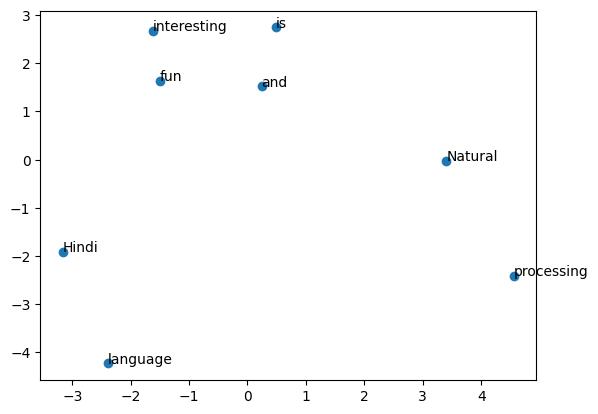

In [25]:
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(unique_words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

Conclusion:

Bag-of-Words provides a simple yet effective way to represent text but lacks context or semantic meaning.

TF-IDF improves upon BoW by weighing words more intelligently, helping in better text classification or clustering tasks.

Word2Vec offers dense, meaningful embeddings where words with similar meanings have similar vectors. It captures semantic relationships and is ideal for deep learning-based NLP tasks.

Overall, the experiment demonstrates the evolution from simple statistical models to context-aware vector representations in natural language processing.

